# This notebook trains a model to predict landmark changes from action units using a partial least squares regression

You will need to download the preprocessed files 'ck_openface_data.csv' and 'ck_facet_Data.csv'.

In [2]:
# load modules
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from feat.plotting import predict, plot_face
from feat.utils import registration
from natsort import natsorted

# Load data 
# Landmarks are extended CK images processed by OpenFace v 2.0
openface_dat  = pd.read_csv('ck_openface_data.csv')
facet_dat = pd.read_csv('ck_facet_data.csv')
facet_dat = facet_dat[natsorted(facet_dat.columns)]

# Train model with FACET AUs on OpenFace landmarks

N_comp: 23 Rsquare 0.61
3-fold accuracy mean 0.53


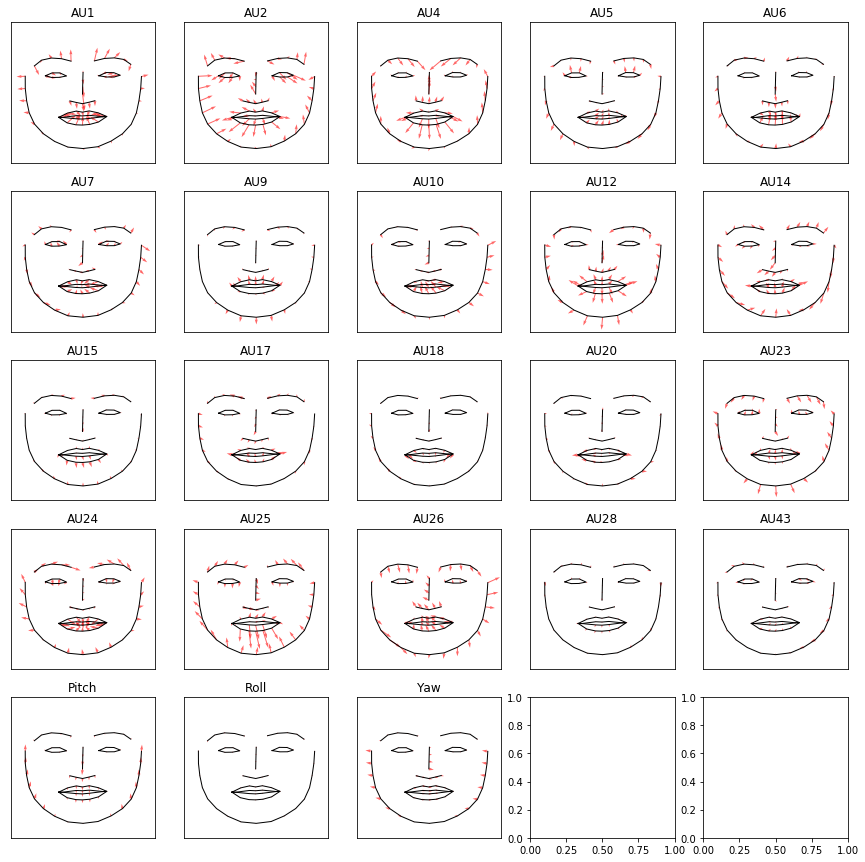

In [3]:
# Subset the landmark data 
lm_cols = ['x_'+str(i) for i in range(0,68)]+['y_'+str(i) for i in range(0,68)]
# Delete rows with na and mask each array
mask =np.any(~np.isnan(np.array(facet_dat)),axis=1)
X = np.array(facet_dat)[mask]
y = registration(openface_dat[lm_cols].as_matrix() [mask])

# Train model
n_components= np.shape(X)[1]
clf_facet = PLSRegression(n_components=n_components,max_iter=1000)
clf_facet.fit(X,y)
print('N_comp:',n_components,'Rsquare', np.round(clf_facet.score(X,y),2))
# Model Accuracy in KFold CV
kf = KFold(n_splits=3)
scores = []
for train_index, test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    clf_facet = PLSRegression(n_components=n_components)
    clf_facet.fit(X_train,y_train)
    scores.append(clf_facet.score(X_test,y_test))
print('3-fold accuracy mean', np.round(np.mean(scores),2))

# Plot results for each action unit
f,axes = plt.subplots(5,5,figsize=(15,15))
axes = axes.flatten()
intensity = 15
for aui, auname in enumerate(facet_dat.columns):
    au = np.zeros(len(clf_facet.x_mean_))
    au[aui] = intensity
    plot_face(au=np.zeros(n_components),model=clf_facet,vectorfield=
              {'target':predict(au,model=clf_facet),'color':'r','alpha':.6},
             ax = axes[aui])
    axes[aui].set(title=auname)

# Train model with OpenFace AUs on OpenFace landmarks

N_comp: 20 Rsquare 0.63
3-fold accuracy mean 0.49


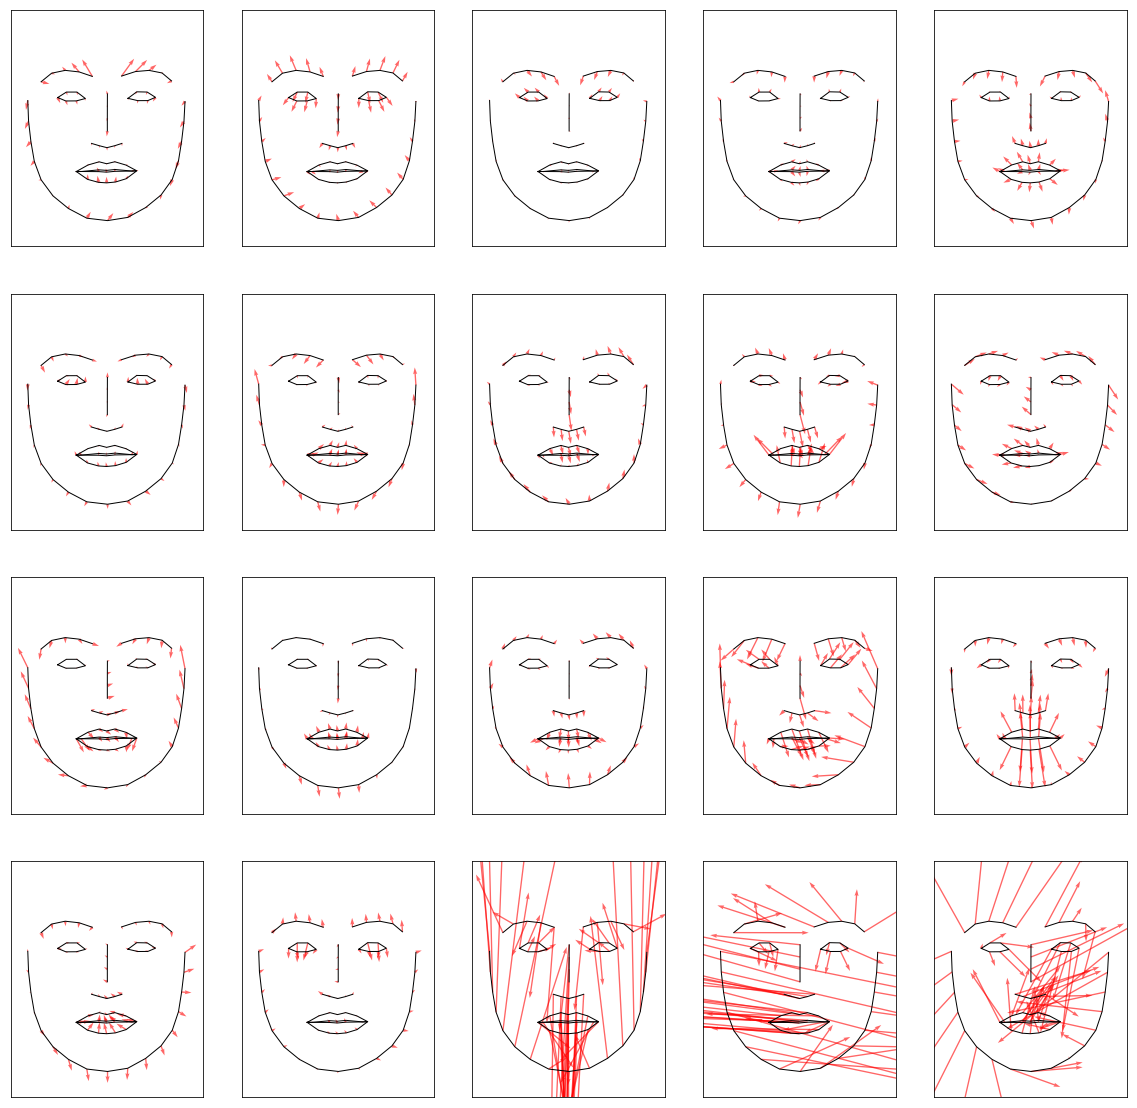

In [5]:
AUcols = [col for col in openface_dat.columns if 'AU' in col and '_r' in col]
AUcols.extend(['pose_Rx','pose_Ry','pose_Rz'])
# Delete rows with na and mask each array
mask = np.any(~np.isnan(np.array(openface_dat[AUcols])),axis=1)
X  = np.array(openface_dat[AUcols])[mask]
y = registration(openface_dat[lm_cols].as_matrix() [mask])

# Train model
n_components=np.shape(X)[1]
clf_facet = PLSRegression(n_components=n_components,max_iter=1000)
clf_facet.fit(X,y)
print('N_comp:',n_components,'Rsquare', np.round(clf_facet.score(X,y),2))
# Model Accuracy in KFold CV
kf = KFold(n_splits=3)
scores = []
for train_index, test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    clf_facet = PLSRegression(n_components=n_components)
    clf_facet.fit(X_train,y_train)
    scores.append(clf_facet.score(X_test,y_test))
print('3-fold accuracy mean', np.round(np.mean(scores),2))

# Plot results for each action unit
f,axes = plt.subplots(4,5,figsize=(20,20))
axes = axes.flatten()
intensity = 10
for aui, auname in enumerate(AUcols):
    au = np.zeros(len(clf_facet.x_mean_))
    au[aui] = intensity
    plot_face(au=np.zeros(n_components),model=clf_facet,vectorfield=
              {'target':predict(au,model=clf_facet),'color':'r','alpha':.6},
             ax = axes[aui])